In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import h5py
h5f=h5py.File('/content/drive/My Drive/Colab Notebooks/SVHN_single_grey1.h5','r')
X_train=h5f['X_train'][:]
X_train.shape
y_train=h5f['y_train'][:]
y_train.shape

(42000,)

In [ ]:
import tensorflow as tf

In [ ]:
X_val=h5f['X_test'][:]
print(X_val.shape)

(18000, 32, 32)


In [ ]:
y_val=h5f['y_test'][:]
print(y_val.shape)


(18000,)


In [ ]:
h5f.close()

In [ ]:
print("Training set",X_train.shape,y_train.shape)

Training set (42000, 32, 32) (42000,)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping


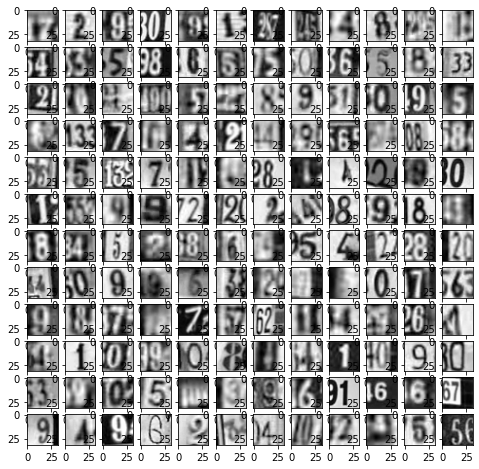

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8, 8))
columns = 12
rows = 12
for i in range(1, columns*rows +1):
    img = X_val[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

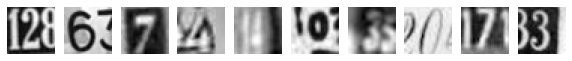

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [ ]:
print(X_train.shape)
print(y_train.shape)


(42000, 32, 32)
(42000,)


In [ ]:
print(X_val.shape)
print(y_val.shape)

(18000, 32, 32)
(18000,)


In [ ]:
N = 42000
x_tr = []
for i in range(N):
    x_tr.append(X_train[i,:].flatten())
x_te = []
for i in range(18000):
    x_te.append(X_val[i,:].flatten())

In [ ]:
print(len(x_tr[0]))
print(len(x_te[0]))

1024
1024


In [ ]:
class NN:
    def __init__(self):
        pass
        
    def train(self, X, y):
        self.tr_x = X
        self.tr_y = y
      
    def predict(self, x):
        min_idx = None
        min_dist = 100000000
        for test_sample in range(len(self.tr_x)):
            dist = 0
            for each_value in range(len(self.tr_x[0])):
                dist += abs(float((self.tr_x[test_sample][each_value] - x[each_value])))
            if dist < min_dist:
                min_dist = dist
                min_idx = test_sample
        return self.tr_y[min_idx]   

In [ ]:
classifier = NN()

In [ ]:
classifier.train(x_tr, y_train)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

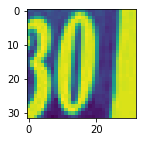

0


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_val[4])
plt.show()
print(classifier.predict(x_te[4]))


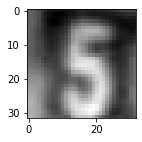

9


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_val[36],cmap="gray")
plt.show()
print(classifier.predict(x_te[36]))

In [ ]:
import keras
from keras import losses
from keras import optimizers
from keras.layers import Dropout, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_val = X_val.reshape(X_val.shape[0], 1024)
X_train = X_train / 255.0
X_val = X_val / 255.0
X_train.shape


(42000, 1024)

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_val1 = np_utils.to_categorical(y_val)
y_val1[0]


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_train.shape

(42000, 10)

In [ ]:
def nn_model():
    model = Sequential()
    model.add(BatchNormalization(input_shape = (1024,)))  
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    sgd = optimizers.Adam(lr=0.001)
    model.compile(loss=losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy']) ### Loss function = Categorical cross entropy
    return model

model = nn_model()
model.fit(X_train, y_train, validation_data=(X_val, y_val1), epochs=50, batch_size=400, verbose=2)
scores = model.evaluate(X_val, y_val1, verbose=0)
model.summary()

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
 - 3s - loss: 1.6830 - accuracy: 0.4240 - val_loss: 1.6142 - val_accuracy: 0.6232
Epoch 2/50
 - 3s - loss: 1.0214 - accuracy: 0.6831 - val_loss: 1.1280 - val_accuracy: 0.7034
Epoch 3/50
 - 2s - loss: 0.8264 - accuracy: 0.7457 - val_loss: 0.8453 - val_accuracy: 0.7598
Epoch 4/50
 - 2s - loss: 0.7279 - accuracy: 0.7739 - val_loss: 0.7601 - val_accuracy: 0.7734
Epoch 5/50
 - 2s - loss: 0.6518 - accuracy: 0.7994 - val_loss: 0.7209 - val_accuracy: 0.7879
Epoch 6/50
 - 3s - loss: 0.6116 - accuracy: 0.8112 - val_loss: 0.7137 - val_accuracy: 0.7885
Epoch 7/50
 - 2s - loss: 0.5707 - accuracy: 0.8233 - val_loss: 0.6804 - val_accuracy: 0.8024
Epoch 8/50
 - 2s - loss: 0.5340 - accuracy: 0.8360 - val_loss: 0.6566 - val_accuracy: 0.8112
Epoch 9/50
 - 2s - loss: 0.5076 - accuracy: 0.8428 - val_loss: 0.6449 - val_accuracy: 0.8126
Epoch 10/50
 - 2s - loss: 0.4839 - accuracy: 0.8501 - val_loss: 0.6645 - val_accuracy: 0.8092
Epoch 11/50
 - 2s -

In [ ]:
results = model.evaluate(X_val, y_val1)

18000/18000 [==============================] - 1s 44us/step


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8353888988494873
